Reading data/SampleEMG.csv
Creating RawArray with float64 data, n_channels=2, n_times=61531
    Range : 0 ... 61530 =      0.000 ...   120.176 secs
Ready.
<RawArray | 2 x 61531 (120.2 s), ~969 kB, data loaded>


(<Figure size 597.6x432 with 1 Axes>, <AxesSubplot:>)

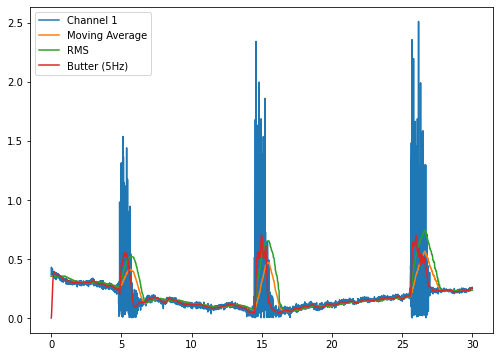

In [3]:
from PhysioAnalyze import Study
from PhysioVisualize import plotBasic, plotMulti
from PhysioGoDSP import butter_lowpass, rectify, extractWindows, getMovingAverage, getRMSEnvelope
import numpy as np

# Create Physio Study
sFreq = 512

study = Study(2, "emg", sFreq)

# Read raw csv file

emgData = study.readFileOriginal("data/SampleEMG.csv", "\t", 2)

#emgData = study.readFileOriginal("data/shimmercalibrated.csv", "\t", 2)

# Transpose, remove timestamps (index channel 1 and 2), convert to float
emgData = emgData.T[2:4].astype(np.float)
study.updateRaw(emgData)

data, times = study.getEpoch(0, 30)

channel_1 = data[0]

# remove the mean
mean = np.mean(channel_1)

channel_1 = mean - channel_1 

# rectify signal (Absolute Value)
rectifiedSignal1 = rectify(channel_1)

# Moving Average
movingAvg = getMovingAverage(rectifiedSignal1, times, sFreq)

#RMS 
rmsEnvelope = getRMSEnvelope(rectifiedSignal1, times, sFreq)

# Butter
filteredData = butter_lowpass(rectifiedSignal1, 3, sFreq, order=2)

plotMulti([rectifiedSignal1, movingAvg, rmsEnvelope, filteredData], ['Channel 1', 'Moving Average', "RMS", "Butter (5Hz)"], times, [8.3, 6])
